In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
streetmap = gpd.read_file('county_boundary/county_boundary.shp')

In [5]:
df = pd.read_csv('crime.csv')

In [6]:
df['count'] = df.groupby(['GEO_LAT', 'GEO_LON'])['INCIDENT_ID'].transform('count')

In [7]:
geometry = [Point(xy) for xy in zip(df['GEO_LON'], df['GEO_LAT'])]

In [8]:
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [9]:
geo_df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,count,geometry
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,...,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,137.0,POINT (-104.8098811 39.773188)
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,74.0,POINT (-104.7814341 39.7856488)
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0,2.0,POINT (-104.9573811 39.6634896)
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0,101.0,POINT (-104.94144 39.7026979)
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0,196.0,POINT (-104.9553703 39.7171074)


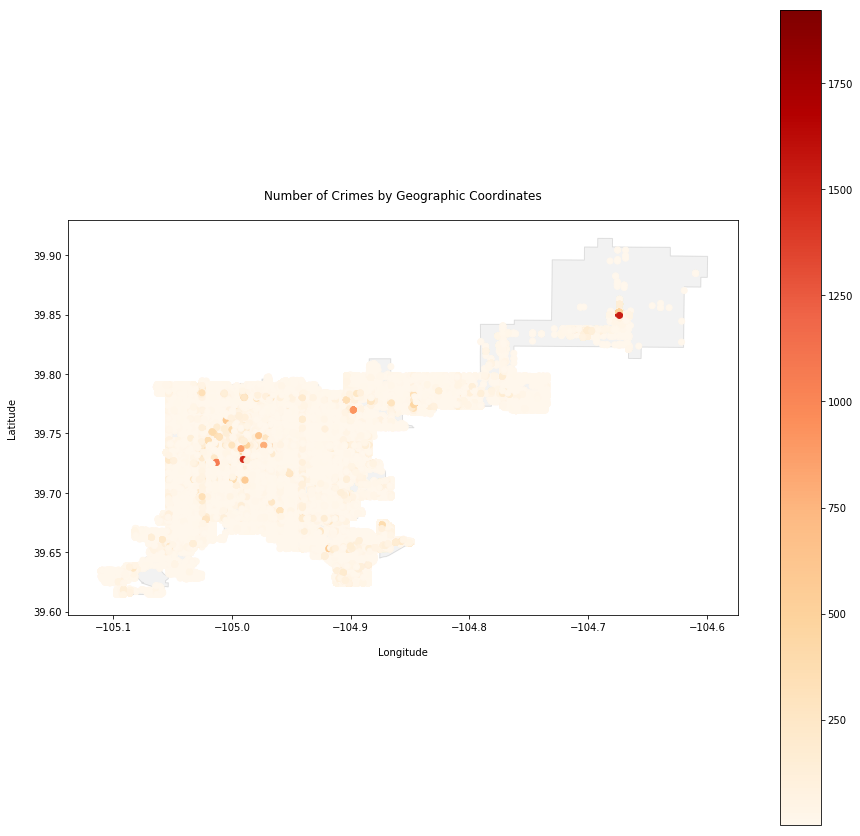

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Number of Crimes by Geographic Coordinates\n')
plt.xlabel('\nLongitude')
plt.ylabel('Latitude\n')

streetmap.plot(ax=ax, alpha=0.1, color='grey', edgecolor='black')
geo_df[(geo_df['GEO_LAT'] > 35) & (geo_df['GEO_LON'] > -105.15)].plot(column='count', ax=ax, legend=True, 
                                                                     cmap='OrRd')

plt.savefig('Chloropleth.png')